# Understanding Loan Status & Classifying borrowers
#### Goals
    - Understand what factors effect loan status 
    - Create a classifer Model that borrow based on rather they will fully pay or be charged off  
#### Members
    - Laurent Mundell
    - Zaki Jefferson

### Table of content
- Import
- Links
- Load Data
- Methods/Constants/Globals
- Clean Data
- Prep Data
- Modeling
    - Logistic Regressor

# import

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.utils import resample
from yellowbrick.datasets import load_concrete
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

%matplotlib inline

# Links

- [kaggle source](https://www.kaggle.com/zaurbegiev/my-dataset#credit_train.csv)
- [Where dat came from](https://data.gov.ie)

# Load Data

In [70]:
_  = os.path.join('data', 'credit_train.csv')
bank_df = pd.read_csv(_)

# Methods/Constants/Globals

In [71]:
%run -i "scripts//methods_globals_constants.py"

# Clean Data

In [72]:
%run -i "scripts//clean_data.py"

# Prep Data

In [83]:
%run -i "scripts//prep_data.py"

# Modeling

### <span style="color:blue">------------------------------------------Base Line Model Logistic Regresssion------------------------------------------ </span>

Model can only do slightly better than random guesses.

Train Accuracy 0.553125
Test Accuracy 0.54375


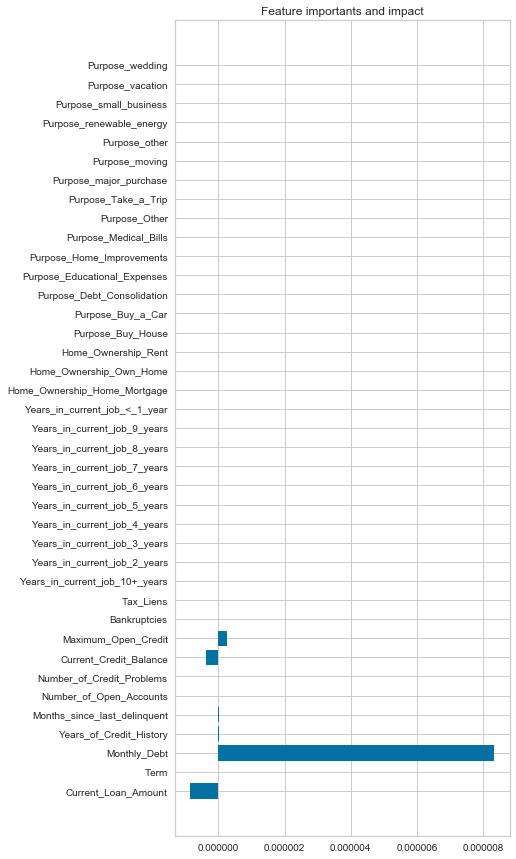

In [90]:
logr_clf = LogisticRegression()
logr_clf.fit(X_train, y_train)
y_pred = logr_clf.predict(X_train)

print('Train Accuracy', logr_clf.score(X_train, y_train))
print('Test Accuracy', logr_clf.score(X_test, y_test))


fig, ax = plt.subplots(figsize=(6, 15))
ax.barh(y=X_train.columns, width=logr_clf.coef_[0])
ax.set_title('Feature importants and impact');

### <span style="color:blue">------------------------------------------ Random Forest------------------------------------------</span>

Train Accuracy 0.7272727272727273
Test Accuracy 0.6640151515151516
OOB Score 0.6489583333333333


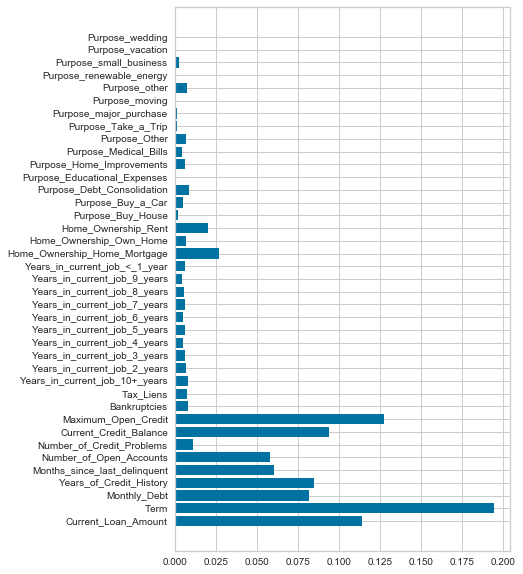

In [85]:
rf_clf = RandomForestClassifier(n_estimators= 300, 
                                criterion= 'gini', 
                                max_depth= 10, 
                                max_features= 'auto',
                                oob_score= True)
rf_clf.fit(X_train, y_train.ravel())

accuracy_train = rf_clf.score(X_train, y_train)
accuracy_test = rf_clf.score(X_test, y_test)
oob = rf_clf.oob_score_

print('Train Accuracy', accuracy_train)
print('Test Accuracy', accuracy_test)
print('OOB Score', oob)

fig, ax = plt.subplots(figsize=(6, 10))
ax.barh(width=rf_clf.feature_importances_, y=X_train.columns);

### <span style="color:blue">------------------------------------------ GradientBoostingClassifier------------------------------------------</span>

Train Accuracy 0.6442708333333333
Test Accuracy 0.6246212121212121


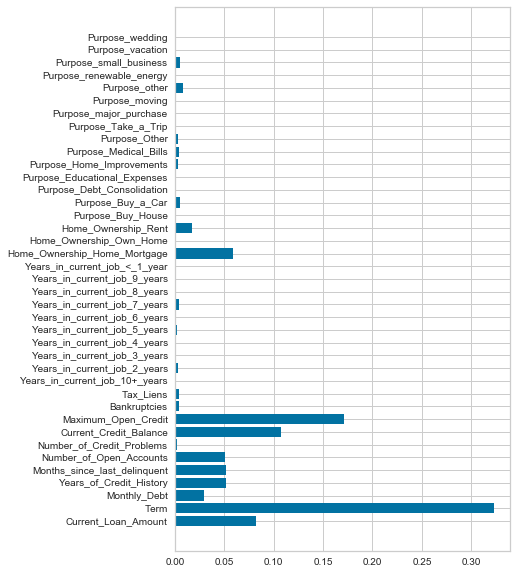

In [86]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train, y_train)

accuracy_train = gbc.score(X_train, y_train.ravel())
accuracy_test = gbc.score(X_test, y_test.ravel())

print('Train Accuracy', accuracy_train)
print('Test Accuracy', accuracy_test)

fig, ax = plt.subplots(figsize=(6, 10))
ax.barh(width=gbc.feature_importances_, y=X_train.columns);

### <span style="color:blue">------------------------------------------AdaBoostClassifier------------------------------------------</span>

Train Accuracy 0.618465909090909
Test Accuracy 0.6136363636363636


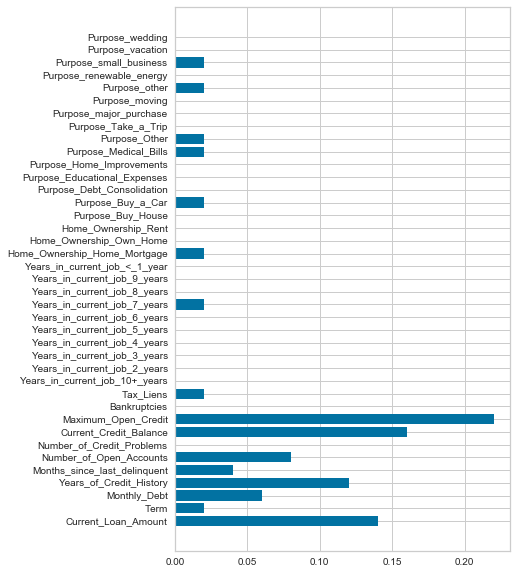

In [87]:
abc = AdaBoostClassifier(random_state=42)

abc.fit(X_train, y_train.ravel())

accuracy_train = abc.score(X_train, y_train)
accuracy_test = abc.score(X_test, y_test)

print('Train Accuracy', accuracy_train)
print('Test Accuracy', accuracy_test)

fig, ax = plt.subplots(figsize=(6, 10))
ax.barh(width=abc.feature_importances_, y=X_train.columns);